In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as nd
import matplotlib

In [ ]:
df = pd.read_csv('DATOS_COMPLETOS.csv',
                 sep=";", parse_dates=['DateObserved'])

In [ ]:
print(df)

            Id   Machine                  DateStr        DateObserved     H  \
0       921880  Batidora      01/09/2018 13:39:16 2018-09-01 13:39:16  0.18   
1       921881  Batidora      01/09/2018 13:39:46 2018-09-01 13:39:46  0.17   
2       921882  Batidora      01/09/2018 13:40:15 2018-09-01 13:40:15  0.17   
3       921883  Batidora      01/09/2018 13:42:56 2018-09-01 13:42:56  0.17   
4       921884  Batidora      01/09/2018 13:43:26 2018-09-01 13:43:26  0.17   
...        ...       ...                      ...                 ...   ...   
700621  863312  Batidora  30/04/2019 12:28:48.199 2019-04-30 12:28:48  0.22   
700622  863313  Batidora  30/04/2019 12:29:16.603 2019-04-30 12:29:16  0.25   
700623  863314  Batidora  30/04/2019 12:29:45.365 2019-04-30 12:29:45  0.24   
700624  863315  Batidora  30/04/2019 12:30:13.938 2019-04-30 12:30:13  0.23   
700625  863316  Batidora  30/04/2019 12:30:43.423 2019-04-30 12:30:43  0.25   

           V    C  
0       0.14  0.1  
1       0.1

In [ ]:
#Le pegamos un primer vistazo al DF
df.head()

,Id,Machine,DateStr,DateObserved,H,V,C
0,921880,Batidora,01/09/2018 13:39:16,2018-09-01 13:39:16,0.18,0.14,0.1
1,921881,Batidora,01/09/2018 13:39:46,2018-09-01 13:39:46,0.17,0.15,0.1
2,921882,Batidora,01/09/2018 13:40:15,2018-09-01 13:40:15,0.17,0.17,0.1
3,921883,Batidora,01/09/2018 13:42:56,2018-09-01 13:42:56,0.17,0.16,0.1
4,921884,Batidora,01/09/2018 13:43:26,2018-09-01 13:43:26,0.17,0.19,0.1


In [ ]:
#Comprobamos que tipo es cada variable, las que son object son strings, solo que esta funcion las cataloga asi.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700626 entries, 0 to 700625
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Id            700626 non-null  int64         
 1   Machine       700626 non-null  object        
 2   DateStr       700626 non-null  object        
 3   DateObserved  700626 non-null  datetime64[ns]
 4   H             700598 non-null  float64       
 5   V             700626 non-null  float64       
 6   C             700619 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 37.4+ MB


In [ ]:
df.Machine.value_counts()

Batidora    700626
Name: Machine, dtype: int64

In [ ]:
batidora = df
cols = ['Id', 'DateStr', 'Machine']
batidora.drop(cols, axis=1, inplace=True)
batidora = batidora.sort_values('DateObserved')
batidora = batidora.set_index('DateObserved')
batidora

,H,V,C
DateObserved,,,
2018-09-01 13:39:16,0.18,0.14,0.1
2018-09-01 13:39:46,0.17,0.15,0.1
2018-09-01 13:40:15,0.17,0.17,0.1
2018-09-01 13:42:56,0.17,0.16,0.1
2018-09-01 13:43:26,0.17,0.19,0.1
...,...,...,...
2019-04-30 12:28:48,0.22,0.21,0.1
2019-04-30 12:29:16,0.25,0.23,0.1
2019-04-30 12:29:45,0.24,0.22,0.1


In [ ]:
#Analisis Valores nulos
batidora.isnull().sum()

H    28
V     0
C     7
dtype: int64

In [ ]:
batidora.dropna(axis=0, inplace=True)
batidora.isnull().sum()

H    0
V    0
C    0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


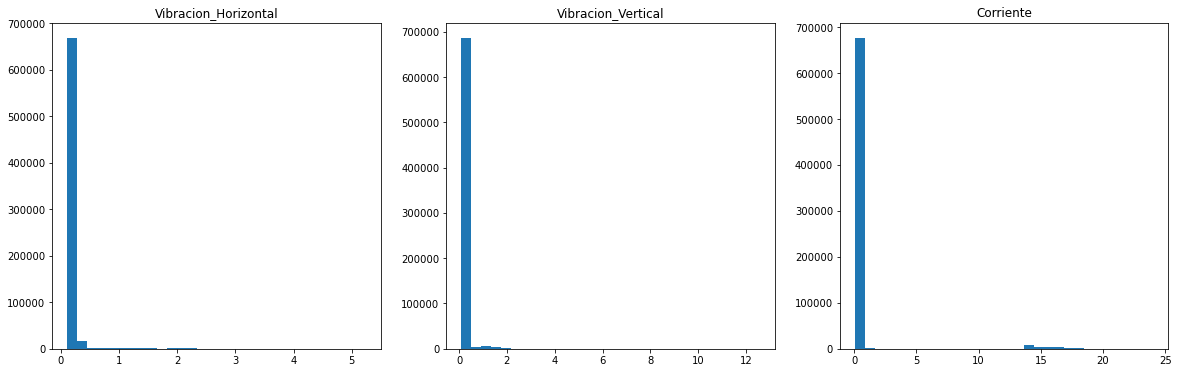

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))
dfsub=df

ax[0].hist(dfsub['H'],bins=30)
ax[1].hist(dfsub['V'],bins=30)
ax[2].hist(dfsub['C'],bins=30)

ax[0].title.set_text('Vibracion_Horizontal')
ax[1].title.set_text('Vibracion_Vertical')
ax[2].title.set_text('Corriente')

plt.show()

In [ ]:
df.describe(percentiles=(.1, .25,.5,.75,.9,.95,0.99))

,H,V,C
count,700598.000000,700626.000000,700619.000000
mean,0.226446,0.243882,0.594269
std,0.191817,0.165516,2.673160
min,0.110000,0.090000,0.080000
10%,0.160000,0.160000,0.090000
25%,0.180000,0.180000,0.090000
50%,0.200000,0.220000,0.100000
75%,0.230000,0.260000,0.100000
90%,0.260000,0.310000,0.100000
95%,0.280000,0.360000,0.110000


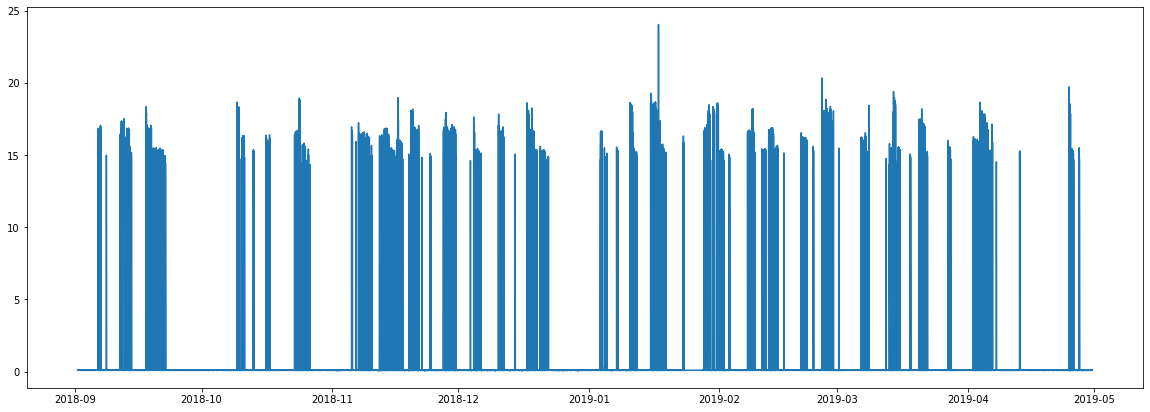

In [ ]:
df = batidora
x=df.index
y=df.C

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.show()

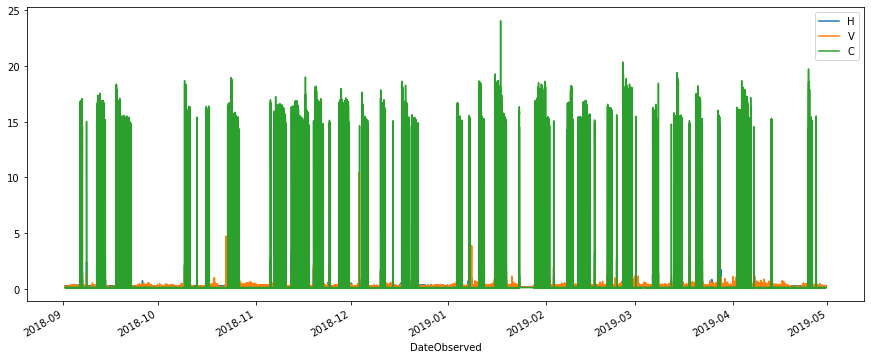

In [ ]:
batidora.plot(figsize=(15,6))
plt.show()

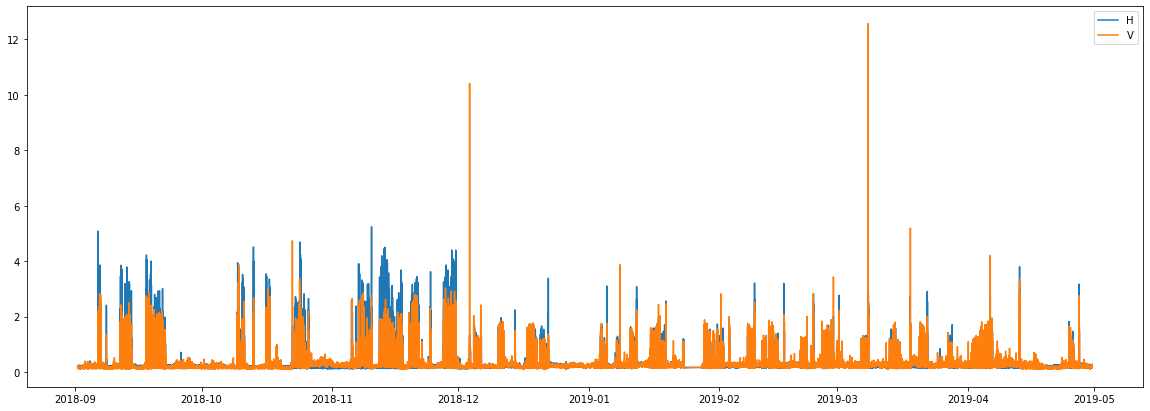

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
df = batidora
x = df.index

ax.plot(x, df['H'],label='H')
ax.plot(x, df['V'],label='V')
ax.legend()
plt.show()

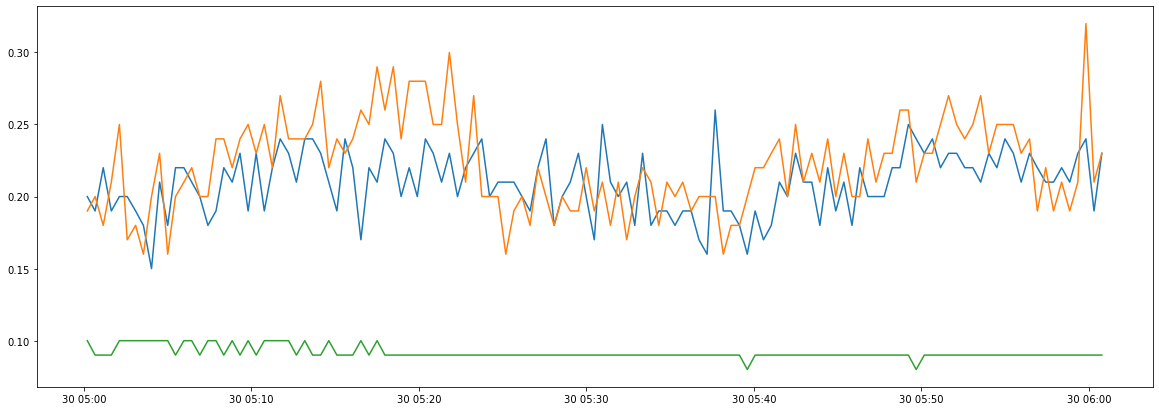

In [ ]:
df7 = df.loc['2018-11-30 05:00':'2018-11-30 06:00']

fig, ax = plt.subplots(figsize=(20,7))
x = df7.index
ax.plot(x,df7['H'])
ax.plot(x,df7['V'])
ax.plot(x,df7['C'])

plt.show()

In [ ]:
df.C.describe(percentiles=(.1,.25,.5,.75,.9,.95,0.99))

count    700591.000000
mean          0.594289
std           2.673212
min           0.080000
10%           0.090000
25%           0.090000
50%           0.100000
75%           0.100000
90%           0.100000
95%           0.110000
99%          15.620000
max          24.050000
Name: C, dtype: float64

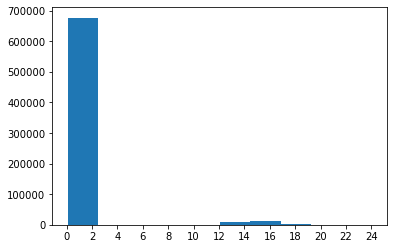

In [ ]:
plt.hist(df.C)
plt.xticks(np.arange(25, step=2))
plt.show()

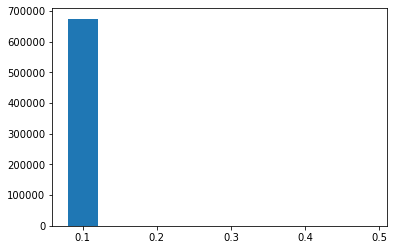

In [ ]:
plt.hist(df[df.C<.5]['C'])
plt.show()

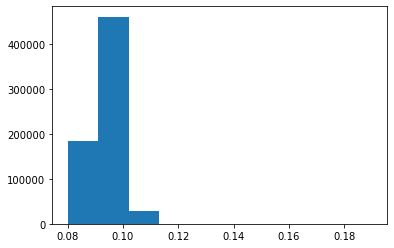

In [ ]:
plt.hist(df[df.C<.2]['C'])
plt.show()

In [ ]:
df.C.value_counts()

0.10     461652
0.09     183551
0.11      29516
14.28       627
14.30       615
          ...  
7.06          1
3.53          1
4.74          1
6.76          1
4.97          1
Name: C, Length: 1556, dtype: int64

In [ ]:
perc=df.C.value_counts().max()/len(df)*100
print("Un {:.2f}% de los valores de C son 0.1".format(perc))

Un 65.89% de los valores de C son 0.1


In [ ]:
df=df[df.C>0.11]
df

,H,V,C
DateObserved,,,
2018-09-06 10:21:25,0.16,0.15,0.12
2018-09-06 10:37:01,5.08,2.18,16.84
2018-09-06 10:37:31,1.93,1.90,16.17
2018-09-06 10:38:01,1.94,1.83,16.18
2018-09-06 10:38:30,1.95,1.77,16.21
...,...,...,...
2019-04-27 11:18:33,0.79,0.85,14.70
2019-04-27 11:19:03,0.80,0.90,14.64
2019-04-27 11:19:31,0.55,0.77,14.48


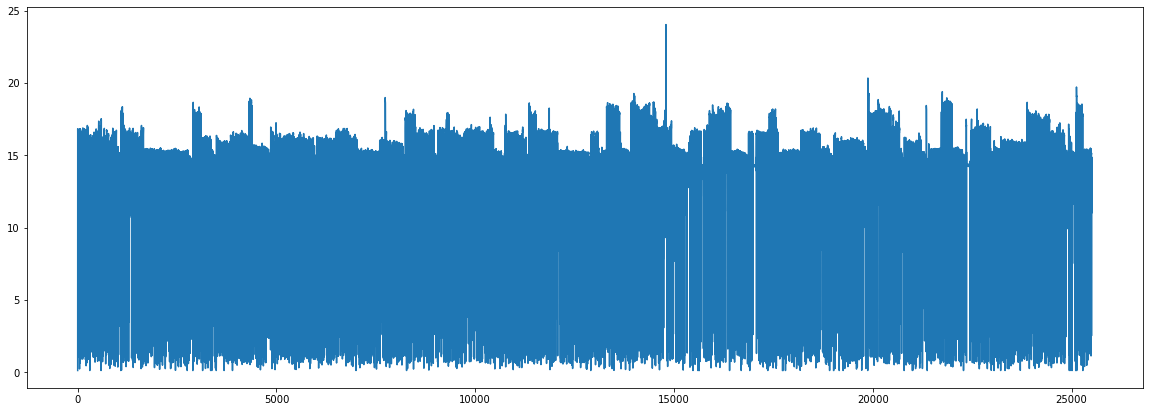

In [ ]:
x=range(len(df))
y=df.C

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.show()

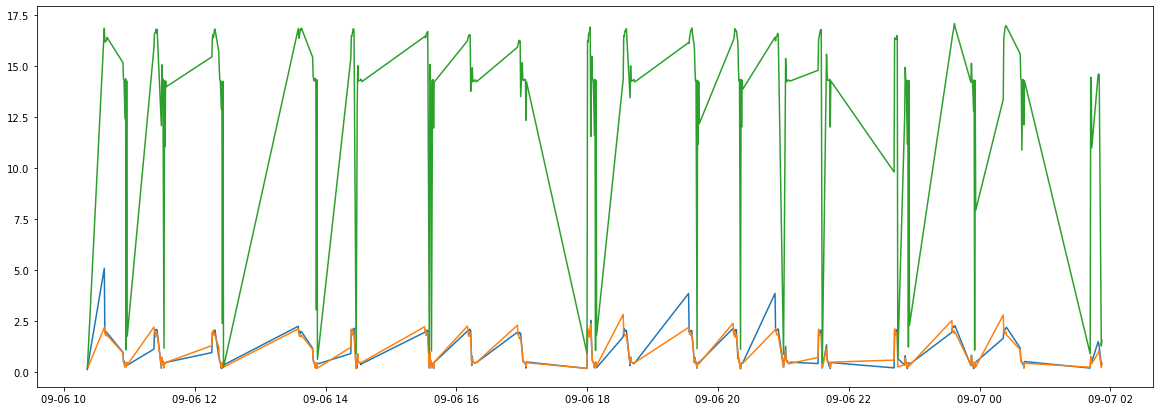

In [ ]:
#Ploteamos las 3 variables en el mismo gráfico:

dfsub=df.loc['2018-9-6 10':'2018-9-7 02']

fig, ax = plt.subplots(figsize=(20,7))
x = dfsub.index
ax.plot(x,dfsub['H'])
ax.plot(x,dfsub['V'])
ax.plot(x,dfsub['C'])
plt.show()

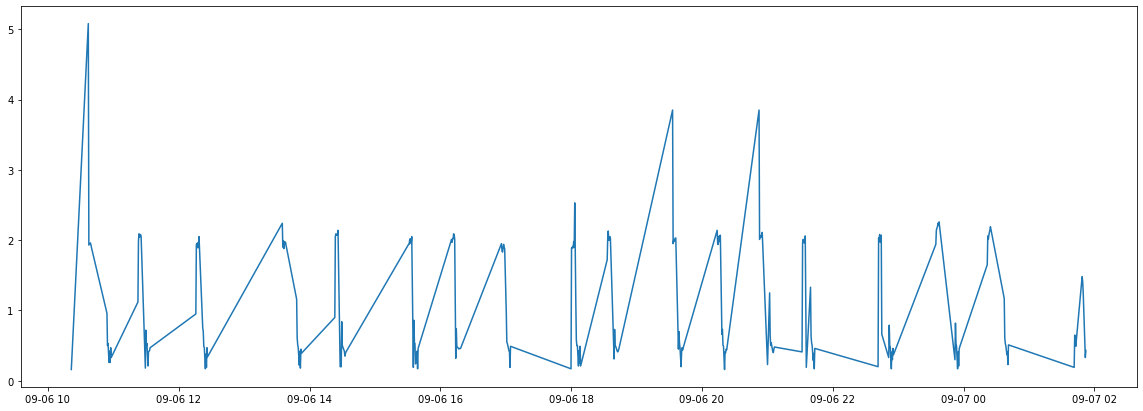

In [ ]:
#Ploteamos solo H:
plt.figure(figsize=(20,7))
plt.plot(x,dfsub['H'])
plt.show()

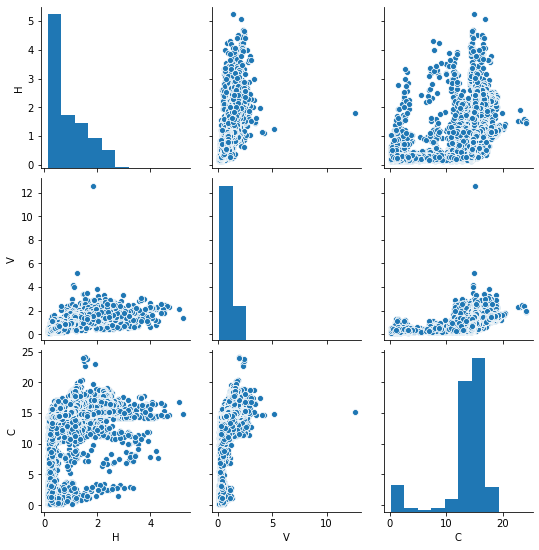

In [ ]:
#Vemos la correlacion entre variables:

sns.pairplot(df)
plt.show()

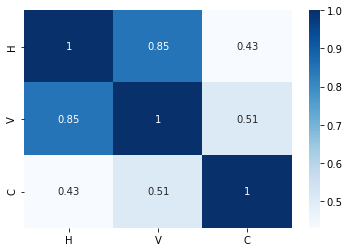

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Usando el método OLS también podemos estudiar la relación entre las variables. Si por ejemplo, nos fijamos en el p-valor (P>|t|), sabemos que si es muy cercano a 0 hay una alta probabilidad de que ambas variables estén relacionadas:

In [ ]:
import statsmodels.api as sm

slr_model = sm.OLS(df['C'], df[['H', 'V']]) #Ordinary Least Squares
slr_reg = slr_model.fit()

slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      C   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                          4.584e+04
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                        09:36:15   Log-Likelihood:                         -84721.
No. Observations:               25521   AIC:                                  1.694e+05
Df Residuals:                   25519   BIC:                                  1.695e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
H             -0.3664      0.113     -3.248      0.001      -0.587      -0.145
V             13.1216      0.130    100.959      0.000      12.867      13.376
==============================================================================
Omnibus:                    10035.333   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           316915.740
Skew:                          -1.264   Prob(JB):                         0.00
Kurtosis:                      20.077   Cond. No.                         6.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
slr_model = sm.OLS(df['H'], df['V']) #Ordinary Least Squares
slr_reg = slr_model.fit()

slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      H   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          2.187e+05
Date:                Tue, 29 Mar 2022   Prob (F-statistic):                        0.00
Time:                        09:37:26   Log-Likelihood:                         -10927.
No. Observations:               25521   AIC:                                  2.186e+04
Df Residuals:                   25520   BIC:                                  2.186e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V              1.0903      0.002    467.609      0.000       1.086       1.095
==============================================================================
Omnibus:                     9218.001   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2644755.210
Skew:                           0.445   Prob(JB):                         0.00
Kurtosis:                      52.863   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que en todos los casos el p-valor es 0 o cercano a 0. Si el p-valor es muy cercano a 0 (<0.05) hay alta probabilidad de que la hipótesis nula sea falsa, por ende, están relacionadas entre sí.

In [ ]:
X=df.values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.00587084, 0.00160772, 0.        ],
       [0.96868885, 0.164791  , 0.69870455],
       [0.35225049, 0.14228296, 0.67070623],
       ...,
       [0.08219178, 0.05144695, 0.60008358],
       [0.07632094, 0.0522508 , 0.59924781],
       [0.08023483, 0.04823151, 0.60259089]])

In [ ]:
X_scaled.shape

(25521, 3)

In [ ]:
dfscaled=pd.DataFrame(X_scaled, columns=['H','V','C'])
dfscaled

,H,V,C
0,0.005871,0.001608,0.000000
1,0.968689,0.164791,0.698705
2,0.352250,0.142283,0.670706
3,0.354207,0.136656,0.671124
4,0.356164,0.131833,0.672378
...,...,...,...
25516,0.129159,0.057878,0.609277
25517,0.131115,0.061897,0.606770
25518,0.082192,0.051447,0.600084
25519,0.076321,0.052251,0.599248


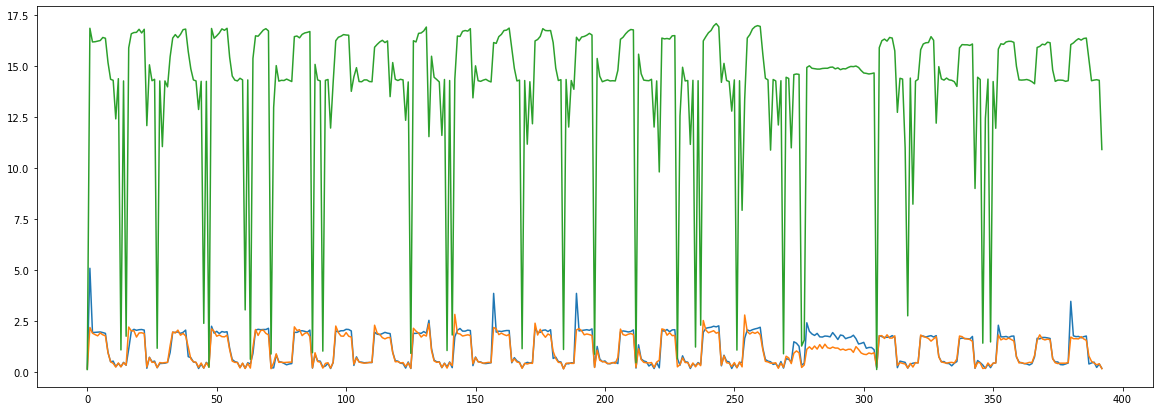

In [ ]:
dfsub=df.iloc[:393]

fig,ax = plt.subplots(figsize=(20,7))
x = range(len(dfsub))
ax.plot(x,dfsub['H'])
ax.plot(x,dfsub['V'])
ax.plot(x,dfsub['C'])
plt.show()

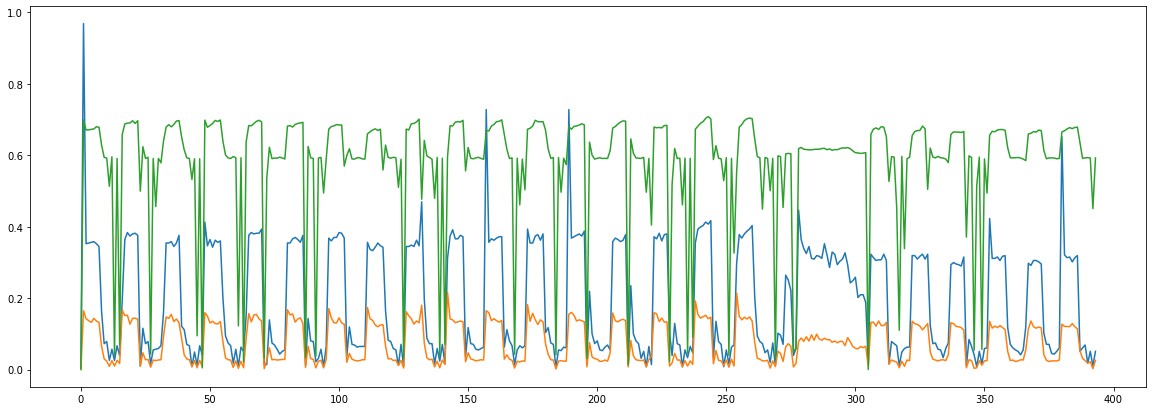

In [ ]:
dfsub=dfscaled.loc[:393]

fig,ax = plt.subplots(figsize=(20,7))
x = dfsub.index
ax.plot(x,dfsub['H'])
ax.plot(x,dfsub['V'])
ax.plot(x,dfsub['C'])
plt.show()

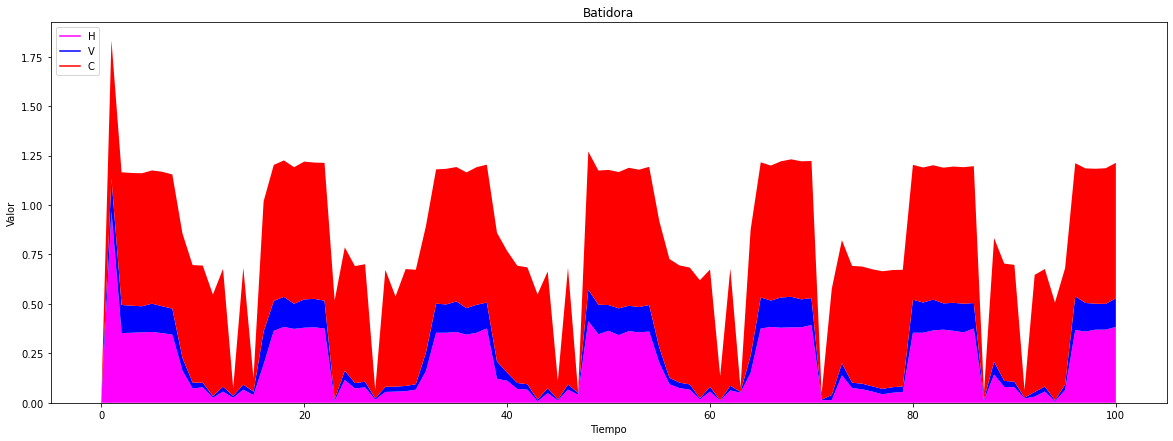

In [ ]:
#Gráficamos en pila

dfsub=dfscaled.loc[:100]
x = dfsub.index

fig, ax = plt.subplots(figsize=(20,7))

plt.plot([], [], color='magenta', label='H')
plt.plot([], [], color='blue', label='V')
plt.plot([], [], color='red', label='C')

plt.stackplot(x, dfsub['H'], dfsub['V'], dfsub['C'], colors = ['magenta', 'blue', 'red'])
plt.legend(loc=2)
plt.title('Batidora')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

En esta parte del proyecto se ha escogido una muestra de datos obtenids de distintas batidoras con el objetivo final de encontrar anomalias en sus rendimientos funcionales de dichas batidoras. En este archivo en el cual empezamos con un analisis de datos y visualizaciones, hemos encontrado una serie de anomalias.